In [119]:
import numpy as np # linear algebra
import sklearn

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [120]:
file_path = "Absolute_Genshin_DB.csv"
df = pd.read_csv(file_path)

In [121]:
df.columns

Index(['charName', 'Gender', 'Element', 'Weapon', 'Region', 'f_val', 'm_val',
       'k_val', 'sum'],
      dtype='object')

In [122]:
df.dtypes

charName    object
Gender      object
Element     object
Weapon      object
Region      object
f_val        int64
m_val        int64
k_val        int64
sum          int64
dtype: object

In [123]:
df.head()

,charName,Gender,Element,Weapon,Region,f_val,m_val,k_val,sum
0,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma,0,1,0,1
1,Albedo,Male,Geo,Sword,Mondstadt,3,6,11,20
2,Amber,Female,Pyro,Bow,Mondstadt,1,7,5,13
3,Arataki Itto,Male,Geo,Claymore,Inazuma,8,11,1,20
4,Beidou,Female,Electro,Claymore,Liyue,16,10,1,27


In [124]:
df['Gender'].value_counts()

Female    24
Male      13
Name: Gender, dtype: int64

In [125]:
df['Element'].value_counts()

Pyro       7
Electro    7
Anemo      6
Geo        6
Cryo       6
Hydro      5
Name: Element, dtype: int64

In [126]:
df['Weapon'].value_counts()

Catalyst    9
Sword       8
Bow         8
Polearm     7
Claymore    5
Name: Weapon, dtype: int64

In [127]:
df['Region'].value_counts()

Inazuma      13
Liyue        12
Mondstadt    11
Snezhnaya     1
Name: Region, dtype: int64

In [128]:
df['Gender'].value_counts(normalize=True)

Female    0.648649
Male      0.351351
Name: Gender, dtype: float64

In [129]:
df['Element'].value_counts(normalize=True)

Pyro       0.189189
Electro    0.189189
Anemo      0.162162
Geo        0.162162
Cryo       0.162162
Hydro      0.135135
Name: Element, dtype: float64

In [130]:
df['Weapon'].value_counts(normalize=True)

Catalyst    0.243243
Sword       0.216216
Bow         0.216216
Polearm     0.189189
Claymore    0.135135
Name: Weapon, dtype: float64

In [131]:
df['Region'].value_counts(normalize=True)

Inazuma      0.351351
Liyue        0.324324
Mondstadt    0.297297
Snezhnaya    0.027027
Name: Region, dtype: float64

In [132]:
average = df['sum'].mean()
print(average)


23.027027027027028


In [133]:
df['f_avg'] = df['f_val'] / average
df['m_avg'] = df['m_val'] / average
df['k_avg'] = df['k_val'] / average

In [134]:
print(df.head())

            charName  Gender  Element    Weapon     Region  f_val  m_val  \
0  Shikanoin Heizou     Male    Anemo  Catalyst    Inazuma      0      1   
1             Albedo    Male      Geo     Sword  Mondstadt      3      6   
2              Amber  Female     Pyro       Bow  Mondstadt      1      7   
3       Arataki Itto    Male      Geo  Claymore    Inazuma      8     11   
4             Beidou  Female  Electro  Claymore      Liyue     16     10   

   k_val  sum     f_avg     m_avg     k_avg  
0      0    1  0.000000  0.043427  0.000000  
1     11   20  0.130282  0.260563  0.477700  
2      5   13  0.043427  0.303991  0.217136  
3      1   20  0.347418  0.477700  0.043427  
4      1   27  0.694836  0.434272  0.043427  


<AxesSubplot:xlabel='f_avg', ylabel='Count'>

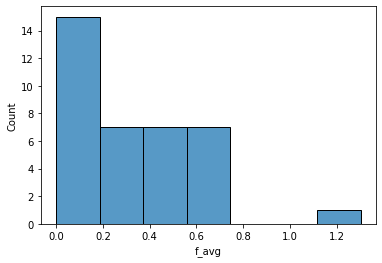

In [135]:
sns.histplot(df['f_avg'])

<AxesSubplot:xlabel='m_avg', ylabel='Count'>

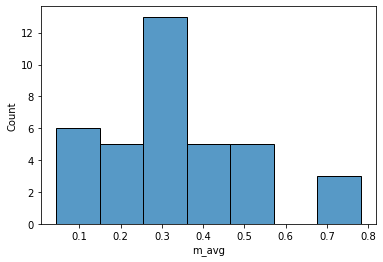

In [136]:
sns.histplot(df['m_avg'])

<AxesSubplot:xlabel='k_avg', ylabel='Count'>

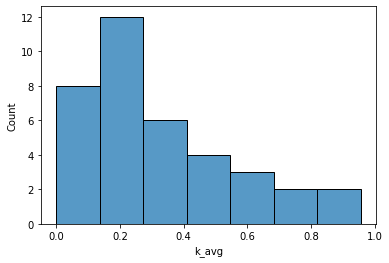

In [137]:
sns.histplot(df['k_avg'])

In [138]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['f_avg'].skew())
print("Kurtosis: %f" % df['f_avg'].kurt())

Skewness: 1.256135
Kurtosis: 2.780699


In [139]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['m_avg'].skew())
print("Kurtosis: %f" % df['m_avg'].kurt())

Skewness: 0.788960
Kurtosis: 0.640920


In [140]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['k_avg'].skew())
print("Kurtosis: %f" % df['k_avg'].kurt())

Skewness: 1.094712
Kurtosis: 0.769328


Analysis of Characters for Max and Min F score

In [141]:
print("The lowest fuckability score was", df['f_avg'].min())
print("The highest fuckability score was", df['f_avg'].max())

The lowest fuckability score was 0.0
The highest fuckability score was 1.3028169014084507


In [142]:
#create filters
lowest = (df['f_avg'] == df['f_avg'].min())
highest = (df['f_avg'] == df['f_avg'].max())

In [143]:
print("The Character with the lowest fuckability score is \n",df.loc[df['f_avg'] == df['f_avg'].min(), 'charName'])
print("The Character with the highest fuckability is \n", df.loc[df['f_avg'] == df['f_avg'].max(), 'charName'])

The Character with the lowest fuckability score is 
 0     Shikanoin Heizou 
25              Sucrose
27                Venti
Name: charName, dtype: object
The Character with the highest fuckability is 
 19    Mona
Name: charName, dtype: object


In [144]:
df.sort_values(by=['f_avg'], ascending = False, inplace = True)
df[['f_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,f_avg,charName,Gender,Element,Weapon,Region
19,1.302817,Mona,Female,Hydro,Catalyst,Mondstadt
4,0.694836,Beidou,Female,Electro,Claymore,Liyue
28,0.694836,Yae Miko,Female,Electro,Catalyst,Inazuma
34,0.694836,Yelan,Female,Hydro,Bow,Liyue
21,0.694836,Raiden Shogun,Female,Electro,Polearm,Inazuma


In [145]:
df.sort_values(by=['f_avg'], ascending = True, inplace = True)
df[['f_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,f_avg,charName,Gender,Element,Weapon,Region
0,0.000000,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma
25,0.000000,Sucrose,Female,Anemo,Catalyst,Mondstadt
27,0.000000,Venti,Male,Anemo,Bow,Mondstadt
2,0.043427,Amber,Female,Pyro,Bow,Mondstadt
33,0.043427,Xiao,Male,Anemo,Polearm,Liyue


Analysis of Characters for Marriage Scores

In [146]:
print("The lowest marriage score was", df['m_avg'].min())
print("The highest marriage score was", df['m_avg'].max())

The lowest marriage score was 0.04342723004694835
The highest marriage score was 0.7816901408450704


In [147]:
print("The Character with the lowest marriagability score is \n",df.loc[df['m_avg'] == df['m_avg'].min(), 'charName'])
print("The Character with the marriagability score is \n", df.loc[df['m_avg'] == df['m_avg'].max(), 'charName'])

The Character with the lowest marriagability score is 
 0     Shikanoin Heizou 
33                 Xiao
Name: charName, dtype: object
The Character with the marriagability score is 
 26      Thoma
16     Keqing
30    Yoimiya
Name: charName, dtype: object


In [150]:
df.sort_values(by=['m_avg'], ascending = False, inplace = True)
df[['m_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,m_avg,charName,Gender,Element,Weapon,Region
30,0.781690,Yoimiya,Female,Pyro,Bow,Inazuma
26,0.781690,Thoma,Male,Pyro,Polearm,Inazuma
16,0.781690,Keqing,Female,Electro,Sword,Liyue
35,0.521127,Kuki Shinobu,Female,Electro,Sword,Inazuma
31,0.521127,Yun Jin,Female,Geo,Polearm,Liyue


In [151]:
df.sort_values(by=['m_avg'], ascending = True, inplace = True)
df[['m_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,m_avg,charName,Gender,Element,Weapon,Region
0,0.043427,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma
33,0.043427,Xiao,Male,Anemo,Polearm,Liyue
5,0.086854,Childe,Male,Hydro,Bow,Snezhnaya
17,0.086854,Kujou Sara,Female,Electro,Bow,Inazuma
21,0.130282,Raiden Shogun,Female,Electro,Polearm,Inazuma


Analysis of Characters for Kill Scores

In [ ]:
print("The lowest marriage score was", df['k_avg'].min())
print("The highest marriage score was", df['k_avg'].max())